# Sanity checks

In [1]:
from math import isclose
from pathlib import Path
from warnings import filterwarnings

import matplotlib.pyplot as plt
import torch
from pytorch_lightning import Trainer
from pytorch_lightning.utilities.seed import seed_everything
from pytorch_lightning.utilities.warnings import PossibleUserWarning

from shipsnet.data import ShipsDataModule
from shipsnet.models import MLPClassifier
from shipsnet.viz import array_to_rgb_image

filterwarnings("ignore", category=PossibleUserWarning)

## Check the data is being loaded correctly

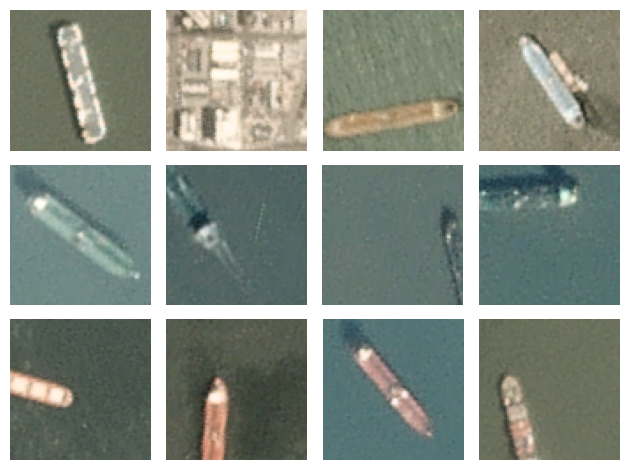

In [2]:
datamodule = ShipsDataModule()

datamodule.prepare_data()
datamodule.setup()

inputs, labels = next(iter(datamodule.train_dataloader()))

fig, axes = plt.subplots(3, 4)

for tensor, ax in zip(inputs, axes.flatten()):
    
    # You may need to undo the data standardisation transformation here...
    
    ax.imshow(array_to_rgb_image(tensor))
    ax.set_axis_off()

fig.tight_layout()
plt.show()

## Reproducibility check

In [3]:
def train_and_eval():
    """Quickly trains model and returns validation metrics."""
    datamodule = ShipsDataModule()
    model = MLPClassifier([10], "relu")
    trainer = Trainer(
        max_epochs=5,
        logger=False,
        enable_checkpointing=False,
        enable_model_summary=False,
        enable_progress_bar=False,
    )
    trainer.fit(model, datamodule)
    (metrics,) = trainer.validate(model, datamodule)
    return metrics


seed = seed_everything()

metrics_1 = train_and_eval()

# Reset the seed and retrain - should get same results
seed_everything(seed)
metrics_2 = train_and_eval()
assert all([isclose(metrics_1[k], metrics_2[k]) for k in metrics_1])

# Don't reset the seed - should get different results
metrics_3 = train_and_eval()
assert not all([isclose(metrics_1[k], metrics_3[k]) for k in metrics_1])

print("Reproducibility check passed!")

/home/joe/.miniconda3/envs/ceres-t3/lib/python3.9/site-packages/pytorch_lightning/utilities/seed.py:55: UserWarning: No seed found, seed set to 2860989982
  rank_zero_warn(f"No seed found, seed set to {seed}")
Global seed set to 2860989982
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/joe/.miniconda3/envs/ceres-t3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/joe/.miniconda3/envs/ceres-t3/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many wo

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      val/accuracy          0.7799999713897705
        val/loss                   22.0
      val/matthews                  0.0
      val/precision                 0.0
       val/recall                   0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      val/accuracy          0.7799999713897705
        val/loss                   22.0
      val/matthews                  0.0
      val/precision                 0.0
       val/recall                   0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      val/accuracy          0.7799999713897705
        val/loss                   22.0
      val/mat

AssertionError: 